In [1]:
!pip install -U textblob
!python -m textblob.download_corpora

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
[nltk_data] Downloading package brown to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

In [17]:
data=pd.read_csv('minnesota.csv')
data.columns

Index(['tweet_id', 'tweet_created_dt', 'retweets', 'favorites', 'tweet_text'], dtype='object')

In [18]:
def str_to_timestamp(s):
    out=[]

    s2=str.split(s,'+')
    s3=str.split(s2[0],' ')

    s4=str.split(s3[0],'-')

    s5=str.split(s3[1],':')
    year=int(s4[0])
    month=int(s4[1])
    day=int(s4[2])
    hour=int(s5[0])
    minute=int(s5[1])
    second=int(s5[2])

    return(datetime(year=year,month=month,day=day,hour=hour,minute=minute,second=second).timestamp())

In [27]:
import sys
print ('hello',end=""),
sys.stdout.flush()

print ('\rhell ',end=""),
sys.stdout.flush()

print ('\rhel ',end=""),
sys.stdout.flush()

hel  

In [28]:
clean_data=data
L_polarity=[]
timestamps=[]
for i in range(clean_data.shape[0]):

    print('\r'+str(i)+'/'+str(clean_data.shape[0]),end="")
 
    blob=TextBlob(clean_data['tweet_text'][i])
    L_polarity.append(blob.sentiment.polarity)
    timestamps.append(str_to_timestamp(clean_data['tweet_created_dt'][i]))

array_polarity=np.asarray(L_polarity)
clean_data.insert(clean_data.columns.shape[0], "sentiment_polarity", array_polarity, True)

array_timestamps=np.asarray(timestamps)
array_timestamps=array_timestamps-array_timestamps.min()
clean_data.insert(clean_data.columns.shape[0], "timestamps", array_timestamps, True)

309069/309070

In [29]:
clean_data.columns

Index(['tweet_id', 'tweet_created_dt', 'retweets', 'favorites', 'tweet_text',
       'sentiment_polarity', 'timestamps'],
      dtype='object')

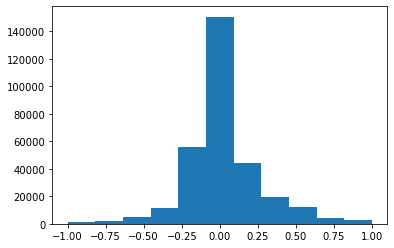

In [33]:
plt.hist(clean_data['sentiment_polarity'],bins=11)
plt.show()

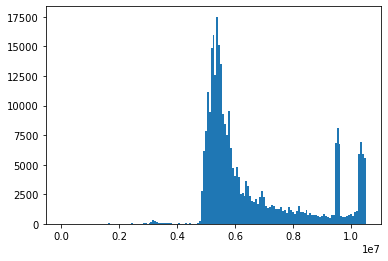

In [34]:
plt.hist(clean_data['timestamps'],bins='auto')
plt.show()